In [1]:
data_url = 'https://towardsdatascience.com/predict-the-number-of-likes-on-instagram-a7ec5c020203'

In [2]:
# In this section:
    
# run linear regression for scalar data to predict likes
# nlp analysis will be in part 03

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
iorig = pd.read_csv('insta_edit.csv',index_col=0)

print(iorig.shape)

iorig.head(2)

(29955, 14)


,USERNAME,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,TEXT,NUMBER OF TAGS,LIST OF TAGS,DATE,PHOTOVIDEO,USERS IN PHOTO,LINK,LOCATION,WEEKDAYMS
0,georgiou82,1134619,915,18560,95,Every day is a #newday and every experience is...,2,#newera#newday,2017-02-11 11:05:10,1,1,https://www.instagram.com/p/BQXZpSQjiPj,"33.0,35.0",5
1,georgiou82,1134619,915,17710,86,#goodnight !!! The #weekend is ahead!!! Have a...,3,#goodnight#goodone#weekend,2017-02-11 00:33:10,1,1,https://www.instagram.com/p/BQWRUV6j8b-,"33.3612275609,35.1713765464",5


In [40]:
# create dummy variable for PHOTOVIDEO

dumm_pv = pd.get_dummies(iorig['PHOTOVIDEO'],drop_first=True)

dumm_pv = dumm_pv.rename(index=int, columns={2:"VIDEO"})

print(dumm_pv.shape)

dumm_pv.head(2)

(29955, 1)


,VIDEO
0,0
1,0


In [41]:
# create dummy variable for WEEKDAYMS

dumm_wd = pd.get_dummies(iorig['WEEKDAYMS'],drop_first=True)

dumm_wd = dumm_wd.rename(index=int, 
                         columns={1:"TUE",2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'})

print(dumm_wd.shape)

dumm_wd.head(2)

(29955, 6)


,TUE,WED,THU,FRI,SAT,SUN
0,0,0,0,0,1,0
1,0,0,0,0,1,0


In [33]:
# create dataset for linear regression

iedit = pd.concat( [iorig['FOLLOWERS'],iorig['FOLLOWING'],iorig['NUMBER OF TAGS'],
                    iorig['USERS IN PHOTO'],dumm_pv, dumm_wd], axis=1)

print(iedit.shape)

iedit.head(2)

(29955, 11)


,FOLLOWERS,FOLLOWING,NUMBER OF TAGS,USERS IN PHOTO,VIDEO,TUE,WED,THU,FRI,SAT,SUN
0,1134619,915,2,1,0,0,0,0,0,1,0
1,1134619,915,3,1,0,0,0,0,0,1,0


In [39]:
itar = iorig['LIKES']

print(itar.shape)

itar[:5]

(29955,)


0    18560
1    17710
2    11959
3    13608
4    15842
Name: LIKES, dtype: int64

ML Linear Regression Portion

In [42]:
# train test split

x_train, x_test, y_train, y_test = train_test_split(iedit, itar)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(22466, 11) (7489, 11) (22466,) (7489,)


In [37]:
lreg = LinearRegression()

print(type(lreg))

<class 'sklearn.linear_model.base.LinearRegression'>


In [43]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
pred_train = lreg.predict(x_train)
pred_test = lreg.predict(x_test)

print ('Fit a model x_train, and calculate the MSE with x_test and y_test: %.2f' 
      %np.mean((y_test - pred_test)**2))

print ('Fit a model x_train, and calculate the MSE with y_train: %.2f' 
      %np.mean((y_train - pred_train)**2))

Fit a model x_train, and calculate the MSE with x_test and y_test: 11750708.04
Fit a model x_train, and calculate the MSE with y_train: 11005243.92


Text(0.5,1,'Residual Plots')

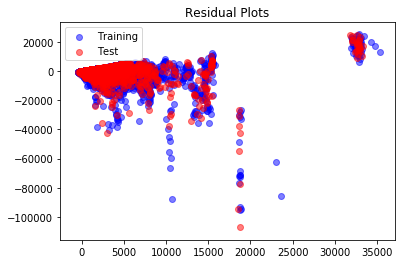

In [46]:
train = plt.scatter(pred_train,(pred_train - y_train),
                   c='b',alpha=0.5)

test = plt.scatter(pred_test,(pred_test - y_test),
                  c='r',alpha=0.5)

plt.legend((train,test),('Training','Test'),loc='best')

plt.hlines(y=0,xmin=0,xmax=40)

plt.title('Residual Plots')

In [47]:
pred = lreg.score(x_test,y_test)

print ('Prediction accuracy is %2.2f%%' %(pred*100))

Prediction accuracy is 37.17%


In [48]:
# Accuracy is low when only using followers, following,
# num of tags, num of users, photo vs video, and weekday.
# In part 03 we will attempt nlp to increase accuracy.

In [49]:
# save non-nlp dataset to CSV

try:
    iedit.to_csv('insta_nonnlp.csv',mode='x')
    print('File saved')
    
except:
    print('File exists')

File saved


In [ ]:
# continue to part 03